# Determine a comercial website success

> Source: http://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html

#### 1. Data description

> This dataset contains 64,000 customers who made purchases within twelve months. 
> 
> Historical customer attributes:
>   - Recency: Months since last purchase.
>   - History_Segment: Categorization of dollars spent in the past year.
>   - History: Actual dollar value spent in the past year.
>   - Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
>   - Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
>   - Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
>   - Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
>   - Channel: Describes the channels the customer purchased from in the past year
>   - E-mail campaign received by the customer: Men-Email, Women E-mail No-email
>
> Response variable:
>   - Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks
>   - Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
>   - Spend: Actual dollars spent in the following two weeks.

#### 2. Objectives: develop models to predict the response variables from the given explanatory variables

#### 3.1. Descriptive statistics 

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('C:/Users/vasiles/OneDrive/STAT 504 Python/project/dataset2.csv')
print data.head()

print data.describe().transpose()

   recency  history_segment  history  mens  womens   zip_code  newbie channel  \
0       10                2   142.44     1       0  Surburban       0   Phone   
1        6                3   329.08     1       1      Rural       1     Web   
2        7                2   180.65     0       1  Surburban       1     Web   
3        9                5   675.83     1       0      Rural       1     Web   
4        2                1    45.34     1       0      Urban       0     Web   

       segment  visit  conversion  spend  
0  WomensEMail      0           0      0  
1      NoEMail      0           0      0  
2  WomensEMail      0           0      0  
3    MensEMail      0           0      0  
4  WomensEMail      0           0      0  
                 count        mean         std    min    25%     50%  \
recency          64000    5.763734    3.507592   1.00   2.00    6.00   
history_segment  64000    2.481969    1.544514   1.00   1.00    2.00   
history          64000  242.085656  256

#### 3.2 Data preparation

In [39]:
# replace missing values with nan's
df=data.replace(' ', np.NaN)
# drop nan's
df=df.dropna()
df.info()
df['Location'] = df['zip_code'].map( {'Surburban': 0, 'Rural': 1, 'Urban': 2} ).astype(int)
df['Purchase_channel'] = df['channel'].map( {'Phone': 0, 'Web': 1, 'Multichannel': 2} ).astype(int)
df['Campaign_type'] = df['segment'].map( {'NoEMail': 0, 'WomensEMail': 1, 'MensEMail': 2} ).astype(int)

print df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64000 entries, 0 to 63999
Data columns (total 12 columns):
recency            64000 non-null int64
history_segment    64000 non-null int64
history            64000 non-null float64
mens               64000 non-null int64
womens             64000 non-null int64
zip_code           64000 non-null object
newbie             64000 non-null int64
channel            64000 non-null object
segment            64000 non-null object
visit              64000 non-null int64
conversion         64000 non-null int64
spend              64000 non-null float64
dtypes: float64(2), int64(7), object(3)
memory usage: 6.3+ MB
   recency  history_segment  history  mens  womens   zip_code  newbie channel  \
0       10                2   142.44     1       0  Surburban       0   Phone   
1        6                3   329.08     1       1      Rural       1     Web   
2        7                2   180.65     0       1  Surburban       1     Web   
3        9        

#### 4. Objective 1: develop models to predict if customers visited website in the following two weeks

In [40]:
X_cols=[ 'recency', 'history', 'mens', 'womens', 'Location', 'newbie', 'Purchase_channel', 'Campaign_type']
X=df[X_cols]
Y=df.visit

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1234567)

print X_train.shape
print X_test.shape

(48000, 8)
(16000, 8)


> 4.1 Naive Bayes

In [41]:
import time
# measure process time
t0 = time.clock()

print time.clock() - t0, "seconds process time"
nb_time=time.clock() - t0
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
X = X_train
y = y_train
nb.fit(X, y)
y_pred_rating=nb.predict(X_test)
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
nb_10cv_auc = cross_val_score(nb, X, y, cv=10, scoring='roc_auc')
print nb_10cv_auc
print nb_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
nb_time=time.clock() - t0

3.47146336424e-05 seconds process time
[ 0.57484355  0.57427245  0.58621181  0.57229435  0.57114952  0.56740379
  0.60746276  0.56582181  0.58620172  0.5926447 ]
0.579830647097
0.530777994182 seconds process time


> 4.2 KNN

[0.51404245204716636, 0.52253745382080863, 0.52999663619769133, 0.53644080774165614, 0.54396527572763698, 0.54726508553652653, 0.54821054790569645, 0.54956934383699574]
[ 0.53742186  0.55508026  0.55726286  0.54044283  0.5500802   0.54380452
  0.55294333  0.5344749   0.56750193  0.55668076]
0.549569343837
14.9113635787 seconds process time


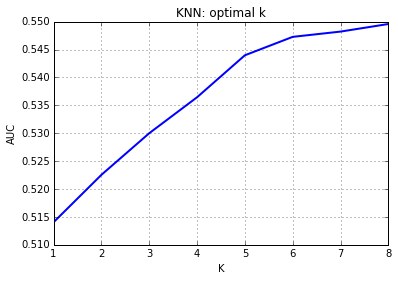

In [42]:
# measure process time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier

X = X_train
y = y_train
# search for an optimal value of K for KNN
k_range = range(1, 9)
k_val = []
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
   k_val.append(scores.mean())
print k_val

# plot the values of K for KNN 
import matplotlib.pyplot as plt
plt.plot(k_range, k_val, linewidth=2.0)
plt.xlabel('K ')
plt.ylabel('AUC')
plt.title('KNN: optimal k')
plt.grid(True)

# use optimal k
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)
knn_pred_rating = knn.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
knn_10cv_auc = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
print knn_10cv_auc
print knn_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
knn_time=time.clock() - t0

> 4.3 Logistic regression

In [43]:
# measure process time
t0 = time.clock()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print lg_10cv_auc
print lg_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
lg_time=time.clock() - t0

[ 0.64243634  0.64564644  0.64579946  0.61983594  0.61726966  0.62933077
  0.6477608   0.6452407   0.64036973  0.63627114]
0.636996097985
2.45565733819 seconds process time


> 4.4 Tree

In [44]:
# measure process time
t0 = time.clock()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
X = X_train
y = y_train
tree.fit(X,y)
from sklearn.cross_validation import cross_val_score
tree_10cv_auc = cross_val_score(tree, X, y, cv=10, scoring='roc_auc')
print tree_10cv_auc
print tree_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
tree_time=time.clock() - t0

[ 0.60720487  0.61475896  0.61708404  0.59308326  0.60410903  0.59244216
  0.62032498  0.60971161  0.6053398   0.60464681]
0.606870554387
0.614497917726 seconds process time


> 4.5 Bagging

[0.60613708034522551, 0.6115706094008212, 0.61636632502027688, 0.6169232937197503, 0.61708741405497114, 0.61698813712455247, 0.61750258600179131]
[ 0.61186827  0.62317505  0.63662795  0.60545108  0.61022556  0.60002235
  0.63081934  0.62140824  0.62166492  0.61376312]
0.617502586002
10.7624438378 seconds process time


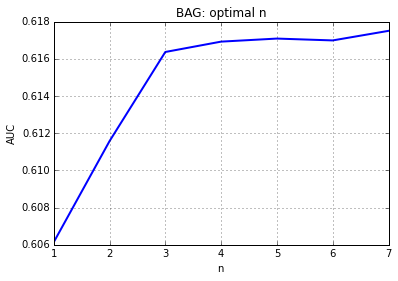

In [45]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import BaggingClassifier
X = X_train
y = y_train

#Find the best no of estimators
bag_n=range(1, 8, 1)
bag_auc_val= []
for n in bag_n:
    bag=BaggingClassifier(tree,n_estimators=n, random_state=1)
    bag_10cv_auc = cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
    bag_auc_val.append(bag_10cv_auc.mean())
print bag_auc_val

# plot the values of n for Bag 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(bag_n, bag_auc_val, linewidth=2.0)
plt.xlabel('n ')
plt.ylabel('AUC')
plt.title('BAG: optimal n')
plt.grid(True)   

# use optimal n
bag=BaggingClassifier(tree,n_estimators=7, random_state=1)
bag.fit(X,y)
from sklearn.cross_validation import cross_val_score
bag_10cv_auc=cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
print bag_10cv_auc
print bag_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
bag_time=time.clock() - t0

> 4.6 Random Forest

[0.5142770041998237, 0.52590140634011362, 0.52997436914011231, 0.5339678691361841, 0.53740149979755647, 0.53906623614093419, 0.54014275652270016]
[ 0.53563897  0.54549038  0.52957326  0.5326644   0.53238018  0.53543758
  0.55120393  0.55061577  0.54331239  0.5451107 ]
0.540142756523
13.1176699296 seconds process time


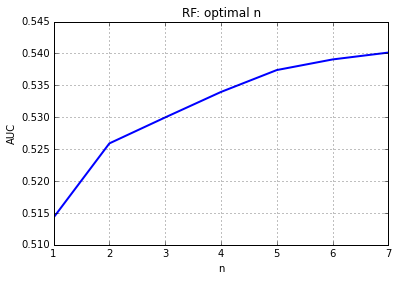

In [47]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier
X = X_train
y = y_train

#Find the best no of estimators
rf_n=range(1, 8, 1)
rf_auc_val= []
for n in rf_n:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf_10cv_auc = cross_val_score(rf, X, y, cv=10, scoring='roc_auc')
    rf_auc_val.append(rf_10cv_auc.mean())
print rf_auc_val

# plot the no of estimators vc cv_auc
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rf_n, rf_auc_val, linewidth=2.0)
plt.xlabel('n')
plt.ylabel('AUC')
plt.title('RF: optimal n')
plt.grid(True)    

# use optimal n
rf = RandomForestClassifier(n_estimators=7, random_state=1)
rf.fit(X,y)
from sklearn.cross_validation import cross_val_score
rf_10cv_auc = cross_val_score(rf, X, y, cv=10, scoring='roc_auc')
print rf_10cv_auc
print rf_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
rf_time=time.clock() - t0

> 4.7 SVM Polynomial - (still running... >20 hrs)

In [10]:
# measure process time
#t0 = time.clock()

#from sklearn import svm
#svmp = svm.SVC(kernel='poly', C = 1.0, degree=3)
#X = X_train
#y = y_train
#svmp.fit(X,y)
#from sklearn.cross_validation import cross_val_score
#svmp_10cv_auc = cross_val_score(svmp, X, y, cv=10, scoring='roc_auc')
#print svmp_10cv_auc
#svmp_10cv_auc.mean()

#print time.clock() - t0, "seconds process time"
#svmp_time=time.clock() - t0

4.8 SVM Gaussian

In [11]:
# measure process time
#t0 = time.clock()

#from sklearn import svm
#svmg = svm.SVC(kernel='rbf', C = 1.0, gamma=0.5)
#X = X_train
#y = y_train
#svmg.fit(X,y)
#from sklearn.cross_validation import cross_val_score
#svmg_10cv_auc = cross_val_score(svmg, X, y, cv=10, scoring='roc_auc')
#print svmg_10cv_auc
#svmg_10cv_auc.mean()


#print time.clock() - t0, "seconds process time"
#svmg_time=time.clock() - t0

> 4.9 Tabulate 10cv_auc_means & time

In [48]:
print 'NB 10CV AUC.mean & process time'
print nb_10cv_auc.mean()
print nb_time
print 'KNN 10CV AUC.mean & process time'
print knn_10cv_auc.mean()
print knn_time
print 'LG 10CV AUC.mean & process time'
print lg_10cv_auc.mean()
print lg_time
print 'TREE 10CV AUC.mean & process time'
print tree_10cv_auc.mean()
print tree_time
print 'BAG 10CV AUC.mean & process time'
print bag_10cv_auc.mean()
print bag_time
print 'RF 10CV AUC.mean & process time'
print rf_10cv_auc.mean()
print rf_time
print 'SVMP 10CV AUC.mean & process time'
print 'still running >20hrs'
#print svmp_10cv_auc.mean()
#print svmp_time
print 'SVMG 10CV AUC.mean & process time'
#print svmg_10cv_auc.mean()
#print svmg_time

NB 10CV AUC.mean & process time
0.579830647097
0.530858592506
KNN 10CV AUC.mean & process time
0.549569343837
14.9114118774
LG 10CV AUC.mean & process time
0.636996097985
2.45573703091
TREE 10CV AUC.mean & process time
0.606870554387
0.614546216346
BAG 10CV AUC.mean & process time
0.617502586002
10.7624936457
RF 10CV AUC.mean & process time
0.540142756523
13.1177197376
SVMP 10CV AUC.mean & process time
still running >20hrs
SVMG 10CV AUC.mean & process time


0.585896788633
0.550306888647
0.645343494916
0.607047138061
0.61639217142
0.554325505707
0.416213665853 seconds process time


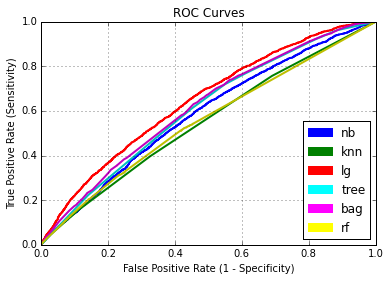

In [49]:
# measure process time
t0 = time.clock()

# If not, use the following; adds also more features....
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
# NB:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
nb_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
nb_fpr, nb_tpr, nb_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# KNN:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# LG:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
logreg_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
lg_fpr, lg_tpr, lg_thresholds = metrics.roc_curve(y_test, y_pred_prob)
#TREE:
y_pred_prob = tree.predict_proba(X_test)[:, 1]
tree_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
tree_fpr, tree_tpr, tree_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# BAG:
y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
bag_fpr, bag_tpr, bag_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# RF:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
rf_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(nb_fpr, nb_tpr, knn_fpr, knn_tpr, lg_fpr, lg_tpr, tree_fpr, tree_tpr, bag_fpr, bag_tpr,rf_fpr, rf_tpr, linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
nb = mpatches.Patch(color='blue', label='nb')
knn= mpatches.Patch(color='green', label='knn')
lg = mpatches.Patch(color='red', label='lg')
tree = mpatches.Patch(color='cyan', label='tree')
bag = mpatches.Patch(color='magenta', label='bag')
rf = mpatches.Patch(color='yellow', label='rf')
plt.legend(handles=[nb,knn,lg,tree,bag,rf], loc=4)
plt.grid(True)


print time.clock() - t0, "seconds process time"
plot_time=time.clock() - t0

> 4.10 Feature selection
> 
> Recursive feature elimination: recursively removing attributes and building a model on those attributes that remain. 
> It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most 
> to predicting the target attribute.

In [50]:
# Recursive Feature Elimination 3 vars
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
X = X_train
y = y_train
X.shape
model = LogisticRegression()
rfe = RFE(model, 3)
rfe=rfe.fit(X,y)
# summarize the selection of the attributes
print 'Best three features:'
print(rfe.support_)
print(rfe.ranking_)
X_train.head()

# Recursive Feature Elimination 2 vars
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
X = X_train
y = y_train
X.shape
model = LogisticRegression()
rfe = RFE(model, 2)
rfe=rfe.fit(X,y)
# summarize the selection of the attributes
print 'Best two features:'
print(rfe.support_)
print(rfe.ranking_)
X_train.head()

Best three features:
[False False  True  True False  True False False]
[4 6 1 1 5 1 3 2]
Best two features:
[False False  True  True False False False False]
[5 7 1 1 6 2 4 3]


,recency,history,mens,womens,Location,newbie,Purchase_channel,Campaign_type
28079,2,65.16,0,1,0,1,0,0
17190,1,312.07,0,1,2,0,1,2
2507,4,301.02,0,1,0,0,0,1
5156,7,128.50,0,1,2,1,1,2
35216,4,120.72,0,1,2,1,1,1


In [51]:
#-----------------------------------------------------------------------------
# Logistic Regression: all prediction variables
#-----------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print 'LG with all seven predictors:'
print lg_10cv_auc
print lg_10cv_auc.mean()

#-----------------------------------------------------------------------------
# Logistic Regression: best 3 variables
#-----------------------------------------------------------------------------

X_cols=[  'mens', 'womens', 'newbie']
X=df[X_cols]
Y=df.visit

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1234567)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print "LG with best three predictors:"
print lg_10cv_auc
print lg_10cv_auc.mean()

LG with all seven predictors:
[ 0.64243634  0.64564644  0.64579946  0.61983594  0.61726966  0.62933077
  0.6477608   0.6452407   0.64036973  0.63627114]
0.636996097985
LG with best three predictors:
[ 0.59215059  0.60419999  0.60748646  0.59103196  0.57235628  0.59758944
  0.59391464  0.59930583  0.61237697  0.60439055]
0.597480271641


#### 5. Objective 2: develop models to predict if customers who visited the website actually purchased something

In [52]:
df2=df[(df.visit==1)]
X_cols=[ 'recency', 'history',  'mens', 'womens', 'Location', 'newbie', 'Purchase_channel', 'Campaign_type']
X=df2[X_cols]
Y=df2.conversion

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1234567)

print X_train.shape
print X_test.shape

(7045, 8)
(2349, 8)


> 5.1 Naive Bayes

In [53]:
import time
# measure process time
t0 = time.clock()

from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
X = X_train
y = y_train
nb.fit(X, y)
y_pred_rating=nb.predict(X_test)
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
nb_10cv_auc = cross_val_score(nb, X, y, cv=10, scoring='roc_auc')
print nb_10cv_auc
print nb_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
nb_time=time.clock() - t0

[ 0.55885023  0.53410657  0.5882272   0.50094697  0.51921488  0.55425275
  0.55451102  0.52491391  0.49368113  0.50792011]
0.533662477477
0.109638774616 seconds process time


> 5.2 KNN

[0.50082229251669486, 0.49907455364399045, 0.50134658022947121, 0.51460012117461229, 0.52530702170237653, 0.52051138707943134, 0.51602518271700648]
[ 0.50895949  0.49821819  0.52910535  0.54352617  0.55487259  0.52556818
  0.48032025  0.54077135  0.52203857  0.54969008]
0.525307021702
1.23881554877 seconds process time


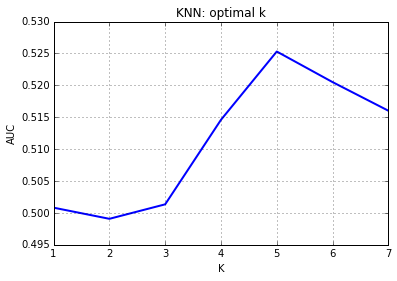

In [55]:
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier

X = X_train
y = y_train
# search for an optimal value of K for KNN
k_range = range(1, 8)
k_val = []
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
   k_val.append(scores.mean())
print k_val

# plot the values of K for KNN 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_val, linewidth=2.0)
plt.xlabel('K ')
plt.ylabel('AUC')
plt.title('KNN: optimal k')
plt.grid(True)

# use optimal k
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn_pred_rating = knn.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
knn_10cv_auc = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
print knn_10cv_auc
print knn_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
knn_time=time.clock() - t0

> 5.3 Logistic Regression

In [56]:
# measure process time
t0 = time.clock()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print lg_10cv_auc
print lg_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
lg_time=time.clock() - t0

[ 0.55928728  0.44501597  0.57543667  0.58076791  0.51673554  0.54881198
  0.56394628  0.59230372  0.4710916   0.4934573 ]
0.534685423552
0.417527690203 seconds process time


> 5.4 Tree

In [57]:
# measure process time
t0 = time.clock()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
X = X_train
y = y_train
tree.fit(X,y)
from sklearn.cross_validation import cross_val_score
tree_10cv_auc = cross_val_score(tree, X, y, cv=10, scoring='roc_auc')
print tree_10cv_auc
print tree_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
tree_time=time.clock() - t0

[ 0.59939486  0.54222558  0.55262344  0.4780303   0.47975207  0.50926309
  0.46825069  0.46585744  0.49168388  0.51363636]
0.510071770518
0.110781640728 seconds process time


> 5.5 Bagging

[0.51898276187816827, 0.52231749224468582, 0.52103321153357252, 0.52622473184603558, 0.51446142417157403, 0.52329202057016322, 0.52462617944678525]
[ 0.53086233  0.45942175  0.54971806  0.5851584   0.52737603  0.53495179
  0.57234848  0.55470041  0.48911846  0.4585916 ]
0.526224731846
1.57578264896 seconds process time


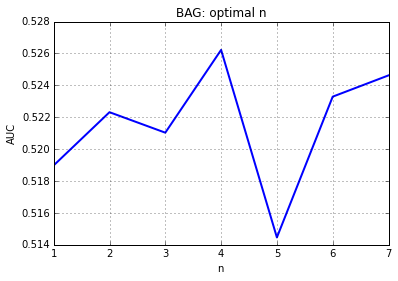

In [58]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import BaggingClassifier
X = X_train
y = y_train

#Find the best no of estimators
bag_n=range(1, 8, 1)
bag_auc_val= []
for n in bag_n:
    bag=BaggingClassifier(tree,n_estimators=n, random_state=1)
    bag_10cv_auc = cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
    bag_auc_val.append(bag_10cv_auc.mean())
print bag_auc_val

# plot the values of n for Bag 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(bag_n, bag_auc_val, linewidth=2.0)
plt.xlabel('n ')
plt.ylabel('AUC')
plt.title('BAG: optimal n')
plt.grid(True)

# use optimal n
bag=BaggingClassifier(tree,n_estimators=4, random_state=1)
bag.fit(X,y)
from sklearn.cross_validation import cross_val_score
bag_10cv_auc=cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
print bag_10cv_auc
print bag_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
bag_time=time.clock() - t0

5.6 Random Forest

[0.49873936205682179, 0.49465369466220449, 0.49431561610465824, 0.4931668875524603, 0.49471814399669922, 0.49182517393019731, 0.4934835287269615]
[ 0.49934443  0.50706001  0.50168478  0.56287879  0.47661846  0.51680441
  0.48419421  0.49480028  0.46742424  0.47658402]
0.498739362057
1.52780189355 seconds process time


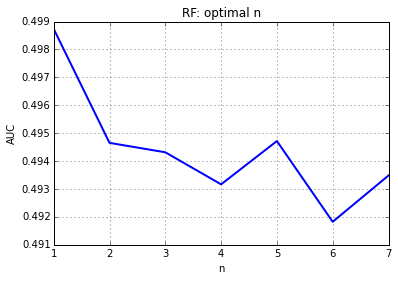

In [59]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier
X = X_train
y = y_train

#Find the best no of estimators
rf_n=range(1, 8, 1)
rf_auc_val= []
for n in rf_n:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf_10cv_auc = cross_val_score(rf, X, y, cv=10, scoring='roc_auc')
    rf_auc_val.append(rf_10cv_auc.mean())
print rf_auc_val

# plot the no of estimators vc cv_auc
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rf_n, rf_auc_val, linewidth=2.0)
plt.xlabel('n')
plt.ylabel('AUC')
plt.title('RF: optimal n')
plt.grid(True)    

# use optimal n
rf = RandomForestClassifier(n_estimators=1, random_state=1)
rf.fit(X,y)
from sklearn.cross_validation import cross_val_score
rf_10cv_auc = cross_val_score(rf, X, y, cv=10, scoring='roc_auc')
print rf_10cv_auc
print rf_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
rf_time=time.clock() - t0

> 5.7 SVM Polynomial

In [23]:
# measure process time
#t0 = time.clock()

#from sklearn import svm
#svmp = svm.SVC(kernel='poly', C = 1.0, degree=3)
#X = X_train
#y = y_train
#svmp.fit(X,y)
#from sklearn.cross_validation import cross_val_score
#svmp_10cv_auc = cross_val_score(svmp, X, y, cv=10, scoring='roc_auc')
#print svmp_10cv_auc
#svmp_10cv_auc.mean()

#print time.clock() - t0, "seconds process time"
#svmp_time=time.clock() - t0

> 5.8 SVM Gaussian

In [24]:
# measure process time
#t0 = time.clock()

#from sklearn import svm
#svmg = svm.SVC(kernel='rbf', C = 1.0, gamma=0.5)
#X = X_train
#y = y_train
#svmg.fit(X,y)
#from sklearn.cross_validation import cross_val_score
#svmg_10cv_auc = cross_val_score(svmg, X, y, cv=10, scoring='roc_auc')
#print svmg_10cv_auc
#svmg_10cv_auc.mean()


#print time.clock() - t0, "seconds process time"
#svmg_time=time.clock() - t0

> 5.9 Tabulate 10cv_auc_means & time

In [60]:
print 'NB 10CV AUC.mean & process time'
print nb_10cv_auc.mean()
print nb_time
print 'KNN 10CV AUC.mean & process time'
print knn_10cv_auc.mean()
print knn_time
print 'LG 10CV AUC.mean & process time'
print lg_10cv_auc.mean()
print lg_time
print 'TREE 10CV AUC.mean & process time'
print tree_10cv_auc.mean()
print tree_time
print 'BAG 10CV AUC.mean & process time'
print bag_10cv_auc.mean()
print bag_time
print 'RF 10CV AUC.mean & process time'
print rf_10cv_auc.mean()
print rf_time
print 'SVMG 10CV AUC.mean & process time'
#print svmp_10cv_auc.mean()
#print svmp_time
print 'SVMP 10CV AUC.mean & process time'
#print svmg_10cv_auc.mean()
#print svmg_time


NB 10CV AUC.mean & process time
0.533662477477
0.109703675887
KNN 10CV AUC.mean & process time
0.525307021702
1.23886565859
LG 10CV AUC.mean & process time
0.534685423552
0.417611609056
TREE 10CV AUC.mean & process time
0.510071770518
0.110830844948
BAG 10CV AUC.mean & process time
0.526224731846
1.57583306065
RF 10CV AUC.mean & process time
0.498739362057
1.52785653136
SVMG 10CV AUC.mean & process time
SVMP 10CV AUC.mean & process time


0.53257156907
0.507173520108
0.545921825576
0.506037186678
0.494839982988
0.495529425055
0.0660559104834 seconds process time


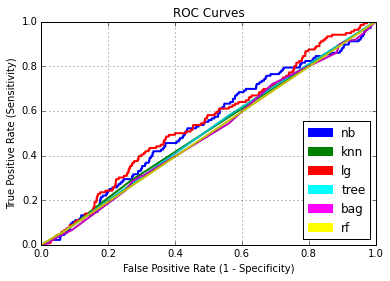

In [61]:
# measure process time
t0 = time.clock()

# If not, use the following; adds also more features....
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
# NB:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
nb_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
nb_fpr, nb_tpr, nb_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# KNN:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# LG:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
logreg_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
lg_fpr, lg_tpr, lg_thresholds = metrics.roc_curve(y_test, y_pred_prob)
#TREE:
y_pred_prob = tree.predict_proba(X_test)[:, 1]
tree_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
tree_fpr, tree_tpr, tree_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# BAG:
y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
bag_fpr, bag_tpr, bag_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# RF:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
rf_auc=metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.roc_auc_score(y_test, y_pred_prob)
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(nb_fpr, nb_tpr, knn_fpr, knn_tpr, lg_fpr, lg_tpr, tree_fpr, tree_tpr, bag_fpr, bag_tpr,rf_fpr, rf_tpr, linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
nb = mpatches.Patch(color='blue', label='nb')
knn= mpatches.Patch(color='green', label='knn')
lg = mpatches.Patch(color='red', label='lg')
tree = mpatches.Patch(color='cyan', label='tree')
bag = mpatches.Patch(color='magenta', label='bag')
rf = mpatches.Patch(color='yellow', label='rf')
plt.legend(handles=[nb,knn,lg,tree,bag,rf], loc=4)
plt.grid(True)


print time.clock() - t0, "seconds process time"
plot_time=time.clock() - t0


> 5.10 Feature selection
> 
> Recursive feature elimination: recursively removing attributes and building a model on those attributes that remain. 
> It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most 
> to predicting the target attribute.

In [62]:
# Recursive Feature Elimination 3 vars
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
X = X_train
y = y_train
X.shape
model = LogisticRegression()
rfe = RFE(model, 3)
rfe=rfe.fit(X,y)
# summarize the selection of the attributes
print 'Best three features:'
print(rfe.support_)
print(rfe.ranking_)
X_train.head()

# Recursive Feature Elimination 2 vars
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
X = X_train
y = y_train
X.shape
model = LogisticRegression()
rfe = RFE(model, 2)
rfe=rfe.fit(X,y)
# summarize the selection of the attributes
print 'Best two features:'
print(rfe.support_)
print(rfe.ranking_)
X_train.head()

# Recursive Feature Elimination 1 var
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
X = X_train
y = y_train
X.shape
model = LogisticRegression()
rfe = RFE(model, 1)
rfe=rfe.fit(X,y)
# summarize the selection of the attributes
print 'Best one feature:'
print(rfe.support_)
print(rfe.ranking_)
X_train.head()

Best three features:
[False False False False False  True  True  True]
[5 6 3 2 4 1 1 1]
Best two features:
[False False False False False  True False  True]
[6 7 4 3 5 1 2 1]
Best one feature:
[False False False False False  True False False]
[7 8 5 4 6 1 3 2]


,recency,history,mens,womens,Location,newbie,Purchase_channel,Campaign_type
29814,10,150.07,0,1,0,0,0,1
56302,1,204.46,1,1,0,0,1,1
10971,8,509.23,1,0,2,1,1,1
11511,3,103.85,1,0,2,1,1,0
21048,5,29.99,0,1,2,0,0,1


In [63]:
df2=df[(df.visit==1)]
X_cols=[ 'recency', 'history', 'mens', 'womens', 'Location', 'newbie', 'Purchase_channel', 'Campaign_type']
X=df2[X_cols]
Y=df2.conversion

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1234567)
#-----------------------------------------------------------------------------
# Logistic Regression: all prediction variables
#-----------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print 'LG with all seven predictors:'
print lg_10cv_auc
print lg_10cv_auc.mean()

#-----------------------------------------------------------------------------
# Logistic Regression: best 2 variables
#-----------------------------------------------------------------------------

X_cols=[ 'newbie',  'Campaign_type']
X=df2[X_cols]
Y=df2.conversion

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1234567)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print "LG with best two predictors:"
print lg_10cv_auc
print lg_10cv_auc.mean()


LG with all seven predictors:
[ 0.55928728  0.44501597  0.57543667  0.58076791  0.51673554  0.54881198
  0.56394628  0.59230372  0.4710916   0.4934573 ]
0.534685423552
LG with best two predictors:
[ 0.51280888  0.46927215  0.5277816   0.60148072  0.52923554  0.55072314
  0.57190083  0.53254132  0.54987948  0.50027548]
0.534589912153


#### 6. Objective 3: develop a regression model to predict how much customers spent in the past two weeks

In [64]:
df3=df2[(df2.conversion==1)]
# Regression
# create dummy variables for location purchase_channel and campaign type
location_dummies=pd.get_dummies(df3.Location, prefix='location')
location_dummies=location_dummies[['location_1','location_2']]
df4=pd.concat([df3,location_dummies], axis=1)

pc_dummies=pd.get_dummies(df3.Purchase_channel, prefix='purchase_channel')
pc_dummies=pc_dummies[['purchase_channel_1','purchase_channel_2']]
df4=pd.concat([df4,pc_dummies], axis=1)

ct_dummies=pd.get_dummies(df3.Campaign_type, prefix='campaign')
ct_dummies=ct_dummies[['campaign_1','campaign_2']]
df4=pd.concat([df4,ct_dummies], axis=1)

print 'Recency: Months since last purchase'
print 'History: Actual dollar value spent in the past year'
print 'Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year'
print 'Newbie: 1/0 indicator, 1 = New customer in the past twelve months'
print 'Location: Surburban: 0, Rural: 1, Urban: 2'
print 'Purchase_channel: Phone: 0, Web: 1, Multichannel: 2'
print 'Campaign_type: NoEMail: 0, WomensEMail: 1, MensEMail:2' 

feature_cols = ['recency','history','womens','newbie','location_1','location_2','purchase_channel_1','purchase_channel_2','campaign_1','campaign_2' ]
X = df4[feature_cols]
y = df4.spend
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print zip(feature_cols, linreg.coef_)

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf
lm = smf.ols(formula='spend ~recency+history+mens+womens+newbie+location_1+location_2+purchase_channel_1+purchase_channel_2+campaign_1+campaign_2', data=df4).fit()
print lm.summary() 

Recency: Months since last purchase
History: Actual dollar value spent in the past year
Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year
Newbie: 1/0 indicator, 1 = New customer in the past twelve months
Location: Surburban: 0, Rural: 1, Urban: 2
Purchase_channel: Phone: 0, Web: 1, Multichannel: 2
Campaign_type: NoEMail: 0, WomensEMail: 1, MensEMail:2
[('recency', 0.68780147364098743), ('history', 0.0092757886070461044), ('womens', -27.057115494324762), ('newbie', 1.9415417429206636), ('location_1', -15.007073387127351), ('location_2', -3.7684544934566486), ('purchase_channel_1', 1.4026193026304892), ('purchase_channel_2', -6.0982017274315492), ('campaign_1', 10.46600526644394), ('campaign_2', -1.2860940399438583)]
                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.001
Method

#### 7. Notes: 
> 'accuracy' vs. 'roc_auc' (cross_val_score(..., X, y, cv=..., scoring='accuracy' or 'roc_auc'))

In [65]:
X_cols=[ 'recency', 'history', 'mens','womens', 'Location', 'newbie', 'Purchase_channel', 'Campaign_type']
X=df[X_cols]
Y=df.visit
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1234567)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions
from sklearn import metrics
# print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print 'AUC values'
print lg_10cv_auc
print lg_10cv_auc.mean()

AUC values
[ 0.64243634  0.64564644  0.64579946  0.61983594  0.61726966  0.62933077
  0.6477608   0.6452407   0.64036973  0.63627114]
0.636996097985


In [66]:
from sklearn.cross_validation import cross_val_score
lg_10cv_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print 'Accuracy values'
print lg_10cv_accuracy
print lg_10cv_accuracy.mean()

Accuracy values
[ 0.85273901  0.85273901  0.85291667  0.85291667  0.85291667  0.85291667
  0.85291667  0.85291667  0.85288602  0.85288602]
0.852875006125


In [32]:
print len(df.visit[(df.visit==1)])
print len(df.visit[(df.visit==0)])

9394
54606


In [33]:
54606.0/(54606+9394)

0.85321875

$Accuracy=\dfrac{(Predicted TRUE|TRUE)+(Predicted FALSE|FALSE)}{TOTAL}$

$Sensitivity=\dfrac{Predicted TRUE|TRUE}{TOTAL TRUE}$

$Specificity=\dfrac{Predicted FALSE|FALSE}{TOTAL FALSE}$

$1-Specificity=\dfrac{Predicted TRUE|FALSE}{TOTAL FALSE}$

> AUC - area under the ROC: Sensitivity (TPR) vs. (1-Specificity)(FPR)

> Accuracy  measures the proportion of the total number of predictions that are correct.
>
> AUC measures the quality of the the classification. Given a random sample of positive & negative observations, AUC gives 
> the proportion of the times your model guesses which is correct.
>
> Accuracy is sensitive to the sample balance (AUC less affected...)

> Most MLM are sensitive to the initial labeled dataset & skewness of the data...